In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
summary = pd.read_csv("datasets/predicted_dichalcogenides_innopolis_202105_v3/summary.csv.gz")

In [4]:
targets = summary.target.unique()

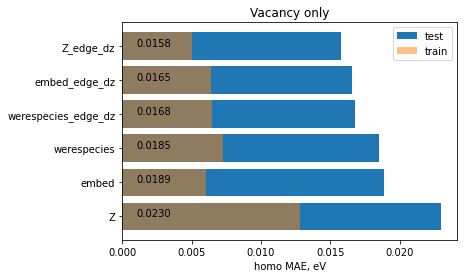

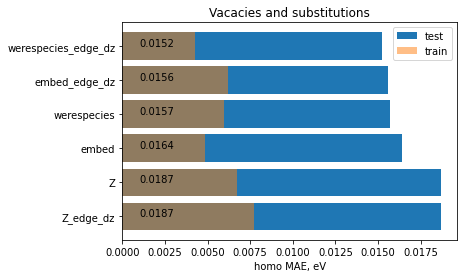

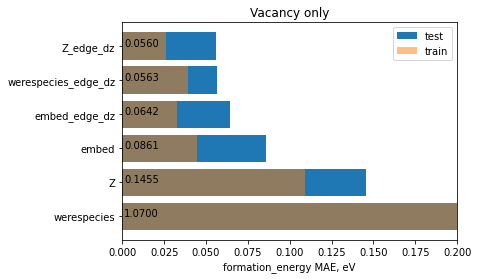

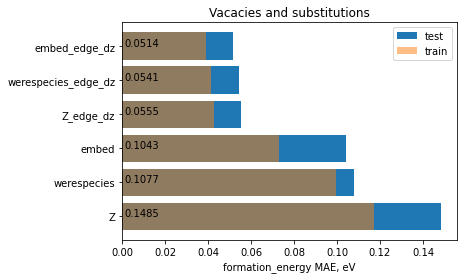

In [41]:
errors = {
  "homo": 3e-3,
  "formation_energy": 0.07
}

def get_label(row):
  return f"{row.atom_features}{'_edge_dz' if row.add_bond_z_coord else ''}"

for target in targets:
  for vacancy_only in (True, False):
    this_summary = summary[(summary.target == target) & (summary.vacancy_only == vacancy_only)].sort_values(
      "test_mae", ignore_index=True, ascending=False)
    fig, ax = plt.subplots()
    x = np.arange(len(this_summary))
    ax.barh(x, this_summary.test_mae, label="test")
    ax.barh(x, this_summary.train_mae, label="train", alpha=0.5)
    ax.set_xlabel(f"{target} MAE, eV")
    ax.set_title(f"{'Vacancy only' if vacancy_only else 'Vacacies and substitutions'}")
    ax.set_yticks(ticks=x, minor=False)
    ax.set_yticklabels(this_summary.apply(get_label, axis=1))
    if any(this_summary.test_mae > 0.8):
      ax.set_xlim(right=0.2)
    ax.legend()
    labels = [f"{mae:.4f}" for mae in this_summary.test_mae]
    #labels = this_summary.test_mae
    for i, v in enumerate(this_summary.test_mae):
      ax.text(1e-3, i, f"{v:.4f}", color='black')